In [51]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split

import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
# --- 1 ---
df = pd.read_csv('KM-01-3.csv')

In [38]:
# df
# GT - Фактичне значення цільової характеристики. 
# Model_1_0 - Результат передбачення моделі № 1 у вигляді ймовірності приналежності об’єкту до класу 0. 
# Model_2_1 - Результат передбачення моделі № 2 у вигляді ймовірності приналежності об’єкту до класу 1. 
# --- 1 ---

In [39]:
# --- 2 ---
print('--- 2 ---\n')
nrows, ncols = df.shape
print(f'Загальна кількість об`єктів = {nrows}')
print(f'Кількість об`єктів класу 1 = {sum(df["GT"])}')
print(f'Кількість об`єктів класу 2 = {nrows - sum(df["GT"])}')
print(f'{100*(sum(df["GT"])/nrows)}% - об`єктів класу 1 у вибірці')
print(f'{100-(100*(sum(df["GT"])/nrows))}% - об`єктів класу 2')
# df.value_counts()
print('\n--- 2 ---')
# --- 2 ---

--- 2 ---

Загальна кількість об`єктів = 4400
Кількість об`єктів класу 1 = 2200
Кількість об`єктів класу 2 = 2200
50.0% - об`єктів класу 1 у вибірці
50.0% - об`єктів класу 2

--- 2 ---


In [40]:
# --- 3 ---
# --- A ---
step = 0.1
my_range = np.arange(step, 1, step)

accuracies_model_1_0 = []
accuracies_model_2_1 = []

precision_model_1_0 = []
precision_model_2_1 = []

recall_model_1_0 = []
recall_model_2_1 = []

f1_score_model_1_0 = []
f1_score_model_2_1 = []

metthews_c_c_model_1_0 = []
metthews_c_c_model_2_1 = []

bal_acc_model_1_0 = []
bal_acc_model_2_1 = []

youden_j_model_1_0 = []
youden_j_model_2_1 = []

auc_pr_model_1_0 = []
auc_pr_model_2_1 = []

auc_roc_model_1_0 = []
auc_roc_model_2_1 = []

for i in my_range:
    # влучність
    accuracies_model_1_0.append(round(accuracy_score(df['GT'], [int(j < i) for j in df['Model_1_0']]), 4))
    accuracies_model_2_1.append(round(accuracy_score(df['GT'], [int(j > i) for j in df['Model_2_1']]), 4))
    
    # точність
    precision_model_1_0.append(round(precision_score(df['GT'], [int(j < i) for j in df['Model_1_0']]), 4))
    precision_model_2_1.append(round(precision_score(df['GT'], [int(j > i) for j in df['Model_2_1']]), 4))

    # повнота
    recall_model_1_0.append(round(recall_score(df['GT'], [int(j < i) for j in df['Model_1_0']]), 4))
    recall_model_2_1.append(round(recall_score(df['GT'], [int(j > i) for j in df['Model_2_1']]), 4))

    # F міра
    f1_score_model_1_0.append(round(f1_score(df['GT'], [int(j < i) for j in df['Model_1_0']]), 4))
    f1_score_model_2_1.append(round(f1_score(df['GT'], [int(j > i) for j in df['Model_2_1']]), 4))

    # Коефіціент кореляції Метьюса
    metthews_c_c_model_1_0.\
        append(round(matthews_corrcoef(df['GT'], [int(j < i) for j in df['Model_1_0']]), 4))
    metthews_c_c_model_2_1.\
        append(round(matthews_corrcoef(df['GT'], [int(j > i) for j in df['Model_2_1']]), 4))

    # Збалансована влучність
    bal_acc_model_1_0.\
        append(round(balanced_accuracy_score(df['GT'], [int(j < i) for j in df['Model_1_0']]), 4))
    bal_acc_model_2_1.\
        append(round(balanced_accuracy_score(df['GT'], [int(j > i) for j in df['Model_2_1']]), 4))

    # Площа під PR-кривою
    auc_pr_model_1_0.\
        append(round(average_precision_score(df['GT'], [int(j < i) for j in df['Model_1_0']]), 4))
    auc_pr_model_2_1.\
        append(round(average_precision_score(df['GT'], [int(j > i) for j in df['Model_2_1']]), 4))
    
    # Площа під ROC-кривою
    auc_roc_model_1_0.\
        append(round(roc_auc_score(df['GT'], [int(j < i) for j in df['Model_1_0']]), 4))
    auc_roc_model_2_1.\
        append(round(roc_auc_score(df['GT'], [int(j > i) for j in df['Model_2_1']]), 4))    

# Індекс Юдена 
for bal_acc in bal_acc_model_1_0:
    youden_j_model_1_0.append(round(2 * bal_acc - 1, 4))
for bal_acc in bal_acc_model_2_1:
    youden_j_model_2_1.append(round(2 * bal_acc - 1, 4))


print(f'Влучність 1-ї моделі - {accuracies_model_1_0}')
print(f'Влучність 2-ї моделі - {accuracies_model_2_1}\n')

print(f'Точність 1-ї моделі - {precision_model_1_0}')
print(f'Точність 2-ї моделі - {precision_model_2_1}\n')

print(f'Повнота 1-ї моделі - {recall_model_1_0}')
print(f'Повнота 2-ї моделі - {recall_model_2_1}\n')

print(f'F-міра 1-ї моделі - {f1_score_model_1_0}')
print(f'F-міра 2-ї моделі - {f1_score_model_2_1}\n')

print(f'Коефіціент кореляції Метьюса 1-ї моделі - {metthews_c_c_model_1_0}')
print(f'Коефіціент кореляції Метьюса 2-ї моделі - {metthews_c_c_model_2_1}\n')

print(f'Збалансована влучність 1-ї моделі - {bal_acc_model_1_0}')
print(f'Збалансована влучність 2-ї моделі - {bal_acc_model_2_1}\n')

print(f'Індекс Юдена 1-ї моделі - {youden_j_model_1_0}')
print(f'Індекс Юдена 2-ї моделі - {youden_j_model_2_1}\n')

print(f'Площа під PR-кривою 1-ї моделі - {auc_pr_model_1_0}')
print(f'Площа під PR-кривою 2-ї моделі - {auc_pr_model_2_1}\n')

print(f'Площа під ROC-кривою 1-ї моделі - {auc_roc_model_1_0}')
print(f'Площа під ROC-кривою 2-ї моделі - {auc_roc_model_2_1}\n')
# --- A ---

Влучність 1-ї моделі - [0.9759, 0.9864, 0.9902, 0.9905, 0.9898, 0.9893, 0.9886, 0.9857, 0.983]
Влучність 2-ї моделі - [0.8123, 0.9911, 0.9911, 0.9911, 0.9914, 0.992, 0.9827, 0.8243, 0.8243]

Точність 1-ї моделі - [0.9902, 0.989, 0.9869, 0.986, 0.9843, 0.983, 0.9812, 0.9755, 0.9687]
Точність 2-ї моделі - [0.7278, 0.9869, 0.9869, 0.9874, 0.9883, 0.9896, 0.9903, 0.9965, 0.9965]

Повнота 1-ї моделі - [0.9614, 0.9836, 0.9936, 0.995, 0.9955, 0.9959, 0.9964, 0.9964, 0.9982]
Повнота 2-ї моделі - [0.9977, 0.9955, 0.9955, 0.995, 0.9945, 0.9945, 0.975, 0.6509, 0.6509]

F-міра 1-ї моделі - [0.9756, 0.9863, 0.9903, 0.9905, 0.9898, 0.9894, 0.9887, 0.9858, 0.9832]
F-міра 2-ї моделі - [0.8416, 0.9912, 0.9912, 0.9912, 0.9914, 0.9921, 0.9826, 0.7875, 0.7875]

Коефіціент кореляції Метьюса 1-ї моделі - [0.9522, 0.9727, 0.9805, 0.9809, 0.9796, 0.9787, 0.9774, 0.9716, 0.9664]
Коефіціент кореляції Метьюса 2-ї моделі - [0.6725, 0.9823, 0.9823, 0.9823, 0.9827, 0.9841, 0.9656, 0.6916, 0.6916]

Збалансована влуч

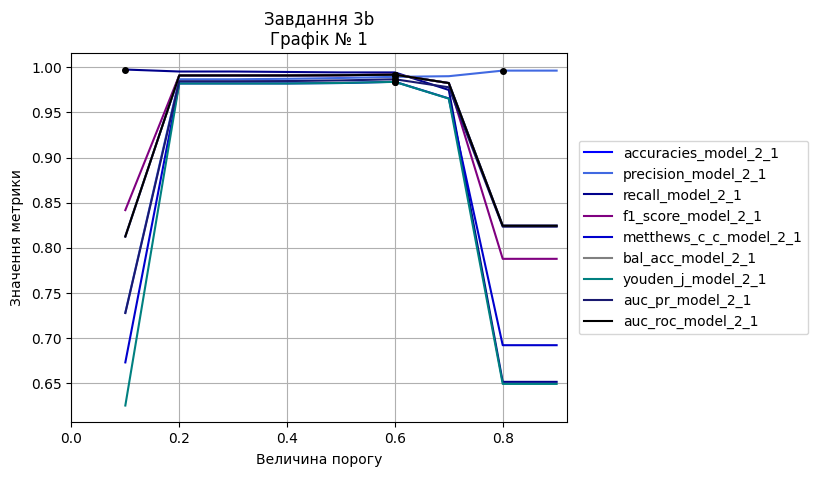

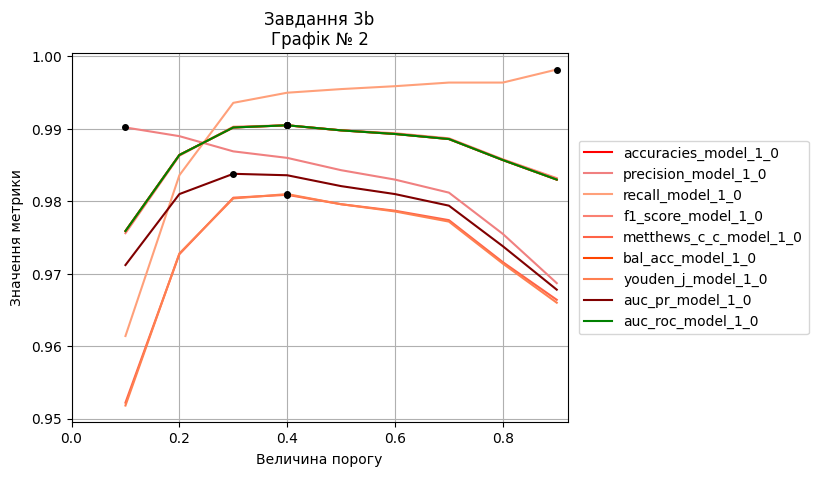

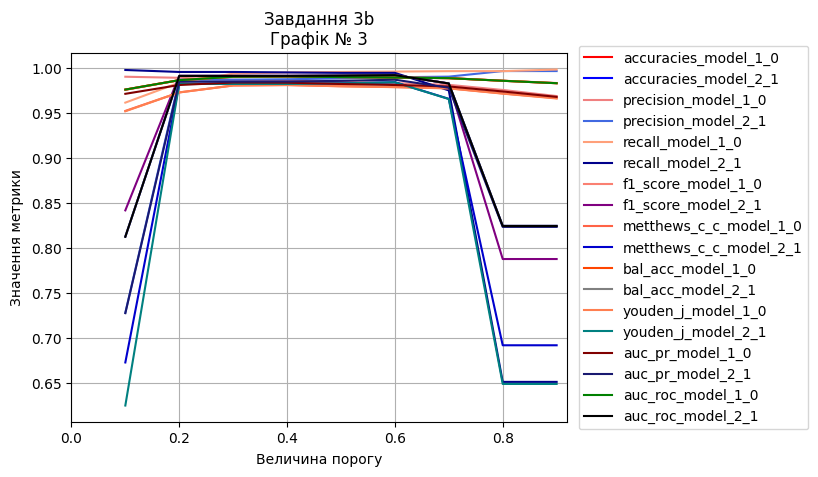

In [44]:
# --- B ---
def paint(values, color, label):
    plt.plot(my_range,
             values,
             color=color,
             label=label)

show_list = [accuracies_model_1_0, accuracies_model_2_1, precision_model_1_0, precision_model_2_1,
             recall_model_1_0, recall_model_2_1, f1_score_model_1_0, f1_score_model_2_1,
             metthews_c_c_model_1_0, metthews_c_c_model_2_1, bal_acc_model_1_0, bal_acc_model_2_1,
             youden_j_model_1_0, youden_j_model_2_1, auc_pr_model_1_0, auc_pr_model_2_1,
             auc_roc_model_1_0, auc_roc_model_2_1]
colors_list = ['red', 'blue', 'lightcoral', 'royalblue', 'lightsalmon', 'darkblue', 'salmon', 'purple',
               'tomato', 'mediumblue', 'orangered', 'grey', 'coral', 'teal', 'maroon', 'midnightblue', 'green',
               'black']
labels_list = ['accuracies_model_1_0', 'accuracies_model_2_1', 'precision_model_1_0', 'precision_model_2_1',
             'recall_model_1_0', 'recall_model_2_1', 'f1_score_model_1_0', 'f1_score_model_2_1',
             'metthews_c_c_model_1_0', 'metthews_c_c_model_2_1', 'bal_acc_model_1_0', 'bal_acc_model_2_1',
             'youden_j_model_1_0', 'youden_j_model_2_1', 'auc_pr_model_1_0', 'auc_pr_model_2_1',
             'auc_roc_model_1_0', 'auc_roc_model_2_1']

input('Натисніть Enter, щоб побачити графіки метрик 1-ї моделі')
for id in range(len(show_list)):
    if id % 2 == 1:
        paint(show_list[id], colors_list[id], labels_list[id])
        plt.plot(np.array(show_list[id]).argmax()/10 + 0.1, max(show_list[id]),
                 'o', color='black', markersize=4)
plt.grid()
plt.title('Завдання 3b\nГрафік № 1')  #  заголовок
plt.xlabel('Величина порогу', labelpad=5)  #  підпис осі Х
plt.ylabel('Значення метрики', labelpad=5)  #  підпис осі У
plt.legend(loc='center right',  #  виведення  легенди графіку на основі label in plt.plot()
           bbox_to_anchor=(1.5, 0.5),)
plt.xlim(0, 0.92)
plt.show()

input('Натисніть Enter, щоб побачити графіки метрик 1-ї моделі')
for id in range(len(show_list)):
    if id % 2 == 0:
        paint(show_list[id], colors_list[id], labels_list[id])
        plt.plot(np.array(show_list[id]).argmax()/10 + 0.1, max(show_list[id]),
                 'o', color='black', markersize=4)
plt.grid()
plt.title('Завдання 3b\nГрафік № 2')  #  заголовок
plt.xlabel('Величина порогу', labelpad=5)  #  підпис осі Х
plt.ylabel('Значення метрики', labelpad=5)  #  підпис осі У
plt.legend(loc='center right',  #  виведення  легенди графіку на основі label in plt.plot()
           bbox_to_anchor=(1.5, 0.5))
plt.xlim(0, 0.92)
plt.show()

input('Натисніть Enter, щоб побачити графіки метрик обох моделей разом')
for id in range(len(show_list)):
    paint(show_list[id], colors_list[id], labels_list[id])

plt.grid()
plt.title('Завдання 3b\nГрафік № 3')  #  заголовок
plt.xlabel('Величина порогу', labelpad=5)  #  підпис осі Х
plt.ylabel('Значення метрики', labelpad=5)  #  підпис осі У
plt.legend(loc='center right',  #  виведення  легенди графіку на основі label in plt.plot()
           bbox_to_anchor=(1.5, 0.5))
# plt.xticks(rotation=45)  #  нахил підписів на осі Х
plt.xlim(0, 0.92)
# plt.ylim(0.5, 1.05)

plt.show()
# --- B ---


Модель 1
Найбільше значення Accuracy = 0.9905, коли поріг = 0.4
Найбільше значення Precision = 0.9902, коли поріг = 0.1
Найбільше значення Recall = 0.9982, коли поріг = 0.9
Найбільше значення F1 score = 0.9905, коли поріг = 0.4
Найбільше значення MCC = 0.9809, коли поріг = 0.4
Найбільше значення Balanced accuracy = 0.9905, коли поріг = 0.4
Найбільше значення Index Youden = 0.981, коли поріг = 0.4
Найбільше значення AUC PR = 0.9838, коли поріг = 0.30000000000000004
Найбільше значення AUC ROC = 0.9905, коли поріг = 0.4

Модель 2
Найбільше значення Accuracy = 0.992, коли поріг = 0.6
Найбільше значення Precision = 0.9965, коли поріг = 0.7999999999999999
Найбільше значення Recall = 0.9977, коли поріг = 0.1
Найбільше значення F1 score = 0.9921, коли поріг = 0.6
Найбільше значення MCC = 0.9841, коли поріг = 0.6
Найбільше значення Balanced accuracy = 0.992, коли поріг = 0.6
Найбільше значення Index Youden = 0.984, коли поріг = 0.6
Найбільше значення AUC PR = 0.9869, коли поріг = 0.6
Найбільше

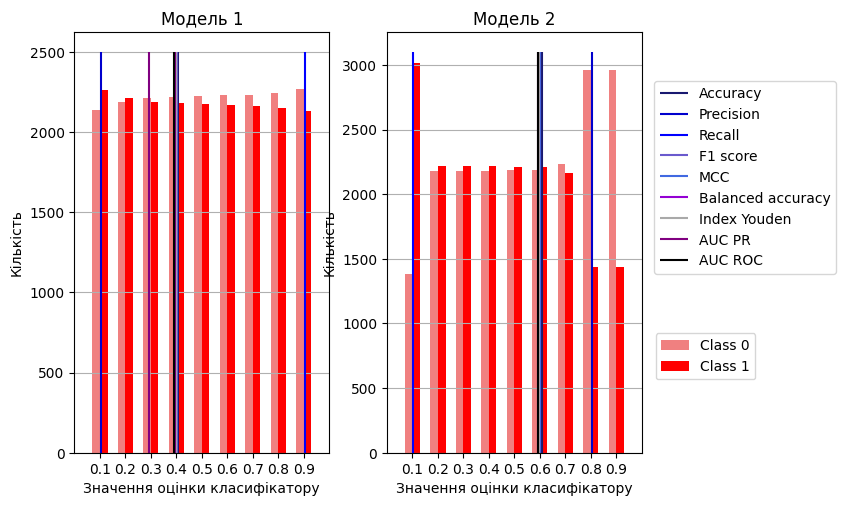

In [42]:
# --- C ---
fig, ax = plt.subplots(1, 2)
fig.tight_layout()

S = 10  #  Залежить від кроку

model_1_class_0 = []
model_1_class_1 = []
model_2_class_0 = []
model_2_class_1 = []

for stp in my_range:
    model_1_class_0.append(sum([int(j < stp) for j in df['Model_1_0']]))
    model_1_class_1.append(sum([int(j > stp) for j in df['Model_1_0']]))

    model_2_class_0.append(sum([int(j < stp) for j in df['Model_2_1']]))
    model_2_class_1.append(sum([int(j > stp) for j in df['Model_2_1']]))

ax[0].set_title('Модель 1')
ax[0].set_xlabel('Значення оцінки класифікатору')
ax[0].set_ylabel('Кількість')
ax[0].yaxis.grid()
ax[0].bar(my_range, my_range)
ax[0].bar(my_range-0.015, model_1_class_0, width=0.03, color='lightcoral', label='Class 0')
ax[0].bar(my_range+0.015, model_1_class_1, width=0.03, color='red', label='Class 1')
ax[0].axes.set_xlim(0, 1)
ax[0].set_xticks(my_range)
ax[0].legend(bbox_to_anchor=(2.7, 0.3))

ax[0].vlines(np.array(accuracies_model_1_0).argmax()/S + 0.008 + 0.1,
             0, 2_500, colors='midnightblue', label='Accuracy')
ax[0].vlines(np.array(precision_model_1_0).argmax()/S + 0.006 + 0.1,
             0, 2_500, colors='mediumblue', label='Precision')
ax[0].vlines(np.array(recall_model_1_0).argmax()/S + 0.004 + 0.1,
             0, 2_500, colors='blue', label='Recall')
ax[0].vlines(np.array(f1_score_model_1_0).argmax()/S + 0.002 + 0.1,
             0, 2_500, colors='slateblue', label='F1 score')
ax[0].vlines(np.array(metthews_c_c_model_1_0).argmax()/S + 0.1,
             0, 2_500, colors='royalblue', label='MCC')
ax[0].vlines(np.array(bal_acc_model_1_0).argmax()/S - 0.002 + 0.1,
             0, 2_500, colors='darkgrey', label='Balanced accuracy')
ax[0].vlines(np.array(youden_j_model_1_0).argmax()/S - 0.004 + 0.1,
             0, 2_500, colors='purple', label='Index Youden')
ax[0].vlines(np.array(auc_pr_model_1_0).argmax()/S - 0.006 + 0.1,
             0, 2_500, colors='purple', label='AUC PR')
ax[0].vlines(np.array(auc_roc_model_1_0).argmax()/S - 0.008 + 0.1,
             0, 2_500, colors='black', label='AUC ROC')

# ----------------------------------------------------------------------------------------

ax[1].set_title('Модель 2')
ax[1].set_xlabel('Значення оцінки класифікатору')
ax[1].set_ylabel('Кількість')
ax[1].yaxis.grid()
ax[1].bar(my_range, my_range)
ax[1].bar(my_range-0.015, model_2_class_0, width=0.03, color='lightcoral')
ax[1].bar(my_range+0.015, model_2_class_1, width=0.03, color='red')
ax[1].axes.set_xlim(0, 1)
ax[1].set_xticks(my_range)

ax[1].vlines(np.array(accuracies_model_2_1).argmax()/S + 0.008 + 0.1,
             0, 3_100, colors='midnightblue', label='Accuracy')
ax[1].vlines(np.array(precision_model_2_1).argmax()/S + 0.006 + 0.1,
             0, 3_100, colors='mediumblue', label='Precision')
ax[1].vlines(np.array(recall_model_2_1).argmax()/S + 0.004 + 0.1,
             0, 3_100, colors='blue', label='Recall')
ax[1].vlines(np.array(f1_score_model_2_1).argmax()/S + 0.002 + 0.1,
             0, 3_100, colors='slateblue', label='F1 score')
ax[1].vlines(np.array(metthews_c_c_model_2_1).argmax()/S + 0.1,
             0, 3_100, colors='royalblue', label='MCC')
ax[1].vlines(np.array(bal_acc_model_2_1).argmax()/S - 0.002 + 0.1,
             0, 3_100, colors='darkviolet', label='Balanced accuracy')
ax[1].vlines(np.array(youden_j_model_2_1).argmax()/S - 0.004 + 0.1,
             0, 3_100, colors='darkgrey', label='Index Youden')
ax[1].vlines(np.array(auc_pr_model_2_1).argmax()/S - 0.006 + 0.1,
             0, 3_100, colors='purple', label='AUC PR')
ax[1].vlines(np.array(auc_roc_model_2_1).argmax()/S - 0.008 + 0.1,
             0, 3_100, colors='black', label='AUC ROC')

ax[1].legend(bbox_to_anchor=(1.79, 0.9))
# ----------------------------------------------------------------------------------------
print('\nМодель 1')
print(f'Найбільше значення Accuracy = {max(accuracies_model_1_0)}, коли поріг = \
{np.array(accuracies_model_1_0).argmax()/S + 0.1}')
print(f'Найбільше значення Precision = {max(precision_model_1_0)}, коли поріг = \
{np.array(precision_model_1_0).argmax()/S + 0.1}')
print(f'Найбільше значення Recall = {max(recall_model_1_0)}, коли поріг = \
{np.array(recall_model_1_0).argmax()/S + 0.1}')
print(f'Найбільше значення F1 score = {max(f1_score_model_1_0)}, коли поріг = \
{np.array(f1_score_model_1_0).argmax()/S + 0.1}')
print(f'Найбільше значення MCC = {max(metthews_c_c_model_1_0)}, коли поріг = \
{np.array(metthews_c_c_model_1_0).argmax()/S + 0.1}')
print(f'Найбільше значення Balanced accuracy = {max(bal_acc_model_1_0)}, коли поріг = \
{np.array(bal_acc_model_1_0).argmax()/S + 0.1}')
print(f'Найбільше значення Index Youden = {max(youden_j_model_1_0)}, коли поріг = \
{np.array(youden_j_model_1_0).argmax()/S + 0.1}')
print(f'Найбільше значення AUC PR = {max(auc_pr_model_1_0)}, коли поріг = \
{np.array(auc_pr_model_1_0).argmax()/S + 0.1}')
print(f'Найбільше значення AUC ROC = {max(auc_roc_model_1_0)}, коли поріг = \
{np.array(auc_roc_model_1_0).argmax()/S + 0.1}')

print('\nМодель 2')
print(f'Найбільше значення Accuracy = {max(accuracies_model_2_1)}, коли поріг = \
{np.array(accuracies_model_2_1).argmax()/S + 0.1}')
print(f'Найбільше значення Precision = {max(precision_model_2_1)}, коли поріг = \
{np.array(precision_model_2_1).argmax()/S + 0.1}')
print(f'Найбільше значення Recall = {max(recall_model_2_1)}, коли поріг = \
{np.array(recall_model_2_1).argmax()/S + 0.1}')
print(f'Найбільше значення F1 score = {max(f1_score_model_2_1)}, коли поріг = \
{np.array(f1_score_model_2_1).argmax()/S + 0.1}')
print(f'Найбільше значення MCC = {max(metthews_c_c_model_2_1)}, коли поріг = \
{np.array(metthews_c_c_model_2_1).argmax()/S + 0.1}')
print(f'Найбільше значення Balanced accuracy = {max(bal_acc_model_2_1)}, коли поріг = \
{np.array(bal_acc_model_2_1).argmax()/S + 0.1}')
print(f'Найбільше значення Index Youden = {max(youden_j_model_2_1)}, коли поріг = \
{np.array(youden_j_model_2_1).argmax()/S + 0.1}')
print(f'Найбільше значення AUC PR = {max(auc_pr_model_2_1)}, коли поріг = \
{np.array(auc_pr_model_2_1).argmax()/S + 0.1}')
print(f'Найбільше значення AUC ROC = {max(auc_roc_model_2_1)}, коли поріг = \
{np.array(auc_roc_model_2_1).argmax()/S + 0.1}')


plt.show()

# --- C ---

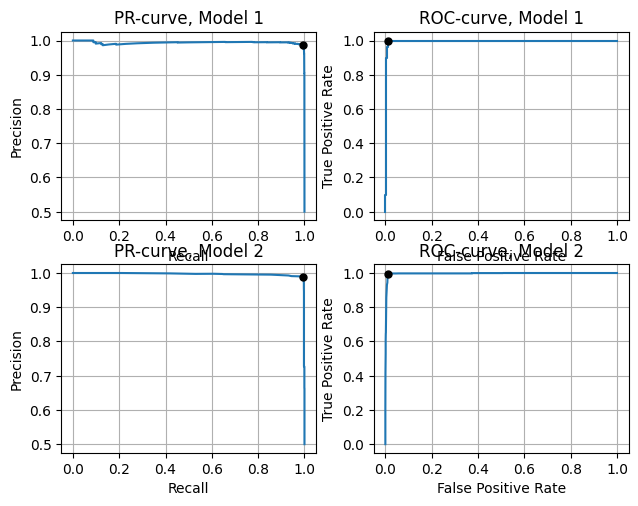

In [43]:
# --- D ---
fig, ax = plt.subplots(2, 2)
fig.tight_layout()

df['Model_1_v2'] = 1 - df['Model_1_0']

# ----------------------------------------------------------------------------------------

precision, recall, thresholds = precision_recall_curve(df['GT'], df['Model_1_v2'])
fscoremax = np.array((2 * precision * recall) / (precision + recall)).argmax()
ax[0][0].set_title('PR-curve, Model 1')
ax[0][0].set_xlabel('Recall')
ax[0][0].set_ylabel('Precision')
ax[0][0].grid()
ax[0][0].plot(recall, precision)
ax[0][0].plot(recall[fscoremax], precision[fscoremax], 'o', color='black', markersize=5)

# ----------------------------------------------------------------------------------------

fpr, tpr, thresholds = roc_curve(df['GT'], df['Model_1_v2'])
gmax = np.array(np.sqrt(tpr * (1 - fpr))).argmax()
ax[0][1].set_title('ROC-curve, Model 1')
ax[0][1].set_xlabel('False Positive Rate')
ax[0][1].set_ylabel('True Positive Rate')
ax[0][1].grid()
ax[0][1].plot(fpr, tpr)
ax[0][1].plot(fpr[gmax], tpr[gmax], 'o', color='black', markersize=5)

# ----------------------------------------------------------------------------------------
precision, recall, thresholds = precision_recall_curve(df['GT'], df['Model_2_1'])
fscoremax = np.array((2 * precision * recall) / (precision + recall)).argmax()
ax[1][0].set_title('PR-curve, Model 2')
ax[1][0].set_xlabel('Recall')
ax[1][0].set_ylabel('Precision')
ax[1][0].grid()
ax[1][0].plot(recall, precision)
ax[1][0].plot(recall[fscoremax], precision[fscoremax], 'o', color='black', markersize=5)

# ----------------------------------------------------------------------------------------
fpr, tpr, thresholds = roc_curve(df['GT'], df['Model_2_1'])
gmax = np.array(np.sqrt(tpr * (1 - fpr))).argmax()
ax[1][1].set_title('ROC-curve, Model 2')
ax[1][1].set_xlabel('False Positive Rate')
ax[1][1].set_ylabel('True Positive Rate')
ax[1][1].grid()
ax[1][1].plot(fpr, tpr)
ax[1][1].plot(fpr[gmax], tpr[gmax], 'o', color='black', markersize=5)

# ----------------------------------------------------------------------------------------

plt.show()
# --- D ---

In [ ]:
# --- 4 ---

# --- 4 ---

In [60]:
# --- 5 ---
bh = '12-06'
bh = bh.split('-')
K = int(bh[1])
rate = 50 + 10*(K%4)
df_no_zero = df[df['GT'] > 0]
df_zeros = df[df['GT'] < 1]
df_30, df_70 = train_test_split(df_no_zero, test_size=rate/100, shuffle=False)
df2 = pd.concat([df_30, df_zeros])
print(df2)
# --- 5 ---

      GT  Model_1_0  Model_2_1  Model_1_v2
0      1   0.014745   0.996526    0.985255
4      1   0.022115   0.786606    0.977885
7      1   0.000372   0.715182    0.999628
9      1   0.067487   0.786606    0.932513
10     1   0.195510   0.643818    0.804490
...   ..        ...        ...         ...
4395   0   0.999753   0.125449    0.000247
4396   0   0.999777   0.125449    0.000223
4397   0   0.909023   0.159557    0.090977
4398   0   0.999737   0.125999    0.000263
4399   0   0.999042   0.000000    0.000958

[2860 rows x 4 columns]


In [64]:
print(f'Загальна кількість об`єктів = {df2.GT.count()}')
print(f'Кількість об`єктів класу 1 = {sum(df2.GT)}')
print(f'Кількість об`єктів класу 0 = {df2.GT.count() - sum(df2.GT)}')
print(f'Відсоток видалених об`єктів класу 1 = {rate}%')

Загальна кількість об`єктів = 2860
Кількість об`єктів класу 1 = 660
Кількість об`єктів класу 0 = 2200
Відсоток видалених об`єктів класу 1 = 70%
